In [17]:
import tradingeconomics as te
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt


In [18]:
te.login('1e9879c059b3474:6hr5wpdewahqbsf')

'Logged with 1e9879c059b3474'

In [35]:
country = input("Enter the country: ")
data = te.getHistoricalData(country=[country], indicator=['gdp'], initDate='2015-01-01', output_type='df')
pd.DataFrame(data)

HTTPError: HTTP Error 403: No Access to this country as free user.


YoY Growth Rate Summary Statistics:
count     8.000000
mean      3.344617
std       6.420296
min      -8.000294
25%       0.345260
50%       3.452818
75%       8.110084
max      11.041721
Name: YoY_Growth, dtype: float64

Highest YoY Growth: 11.04% (2018)
Lowest YoY Growth: -8.00% (2020)


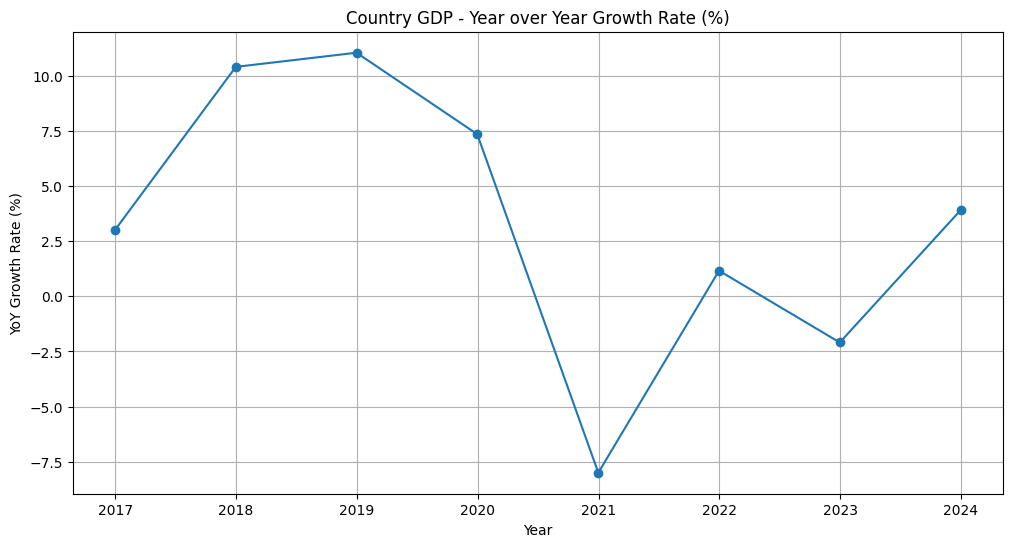

In [33]:
# Clean the data by removing the first row (free account message) and reset index
clean_data = data[data['Country'].isin(['Mexico', 'New Zealand', 'Sweden', 'Thailand'])].copy()
clean_data['DateTime'] = pd.to_datetime(clean_data['DateTime'])
clean_data = clean_data.sort_values('DateTime')

# Calculate YoY growth rate
clean_data['YoY_Growth'] = clean_data['Value'].pct_change() * 100

# Create a new plot
plt.figure(figsize=(12, 6))
plt.plot(clean_data['DateTime'], clean_data['YoY_Growth'], marker='o')
plt.title('Country GDP - Year over Year Growth Rate (%)')
plt.xlabel('Year')
plt.ylabel('YoY Growth Rate (%)')
plt.grid(True)

# Print summary statistics
print("\nYoY Growth Rate Summary Statistics:")
print(clean_data['YoY_Growth'].describe())

# Find years with highest and lowest growth
max_growth = clean_data.loc[clean_data['YoY_Growth'].idxmax()]
min_growth = clean_data.loc[clean_data['YoY_Growth'].idxmin()]

print(f"\nHighest YoY Growth: {max_growth['YoY_Growth']:.2f}% ({max_growth['DateTime'].year})")
print(f"Lowest YoY Growth: {min_growth['YoY_Growth']:.2f}% ({min_growth['DateTime'].year})")


R-squared score: 0.8135


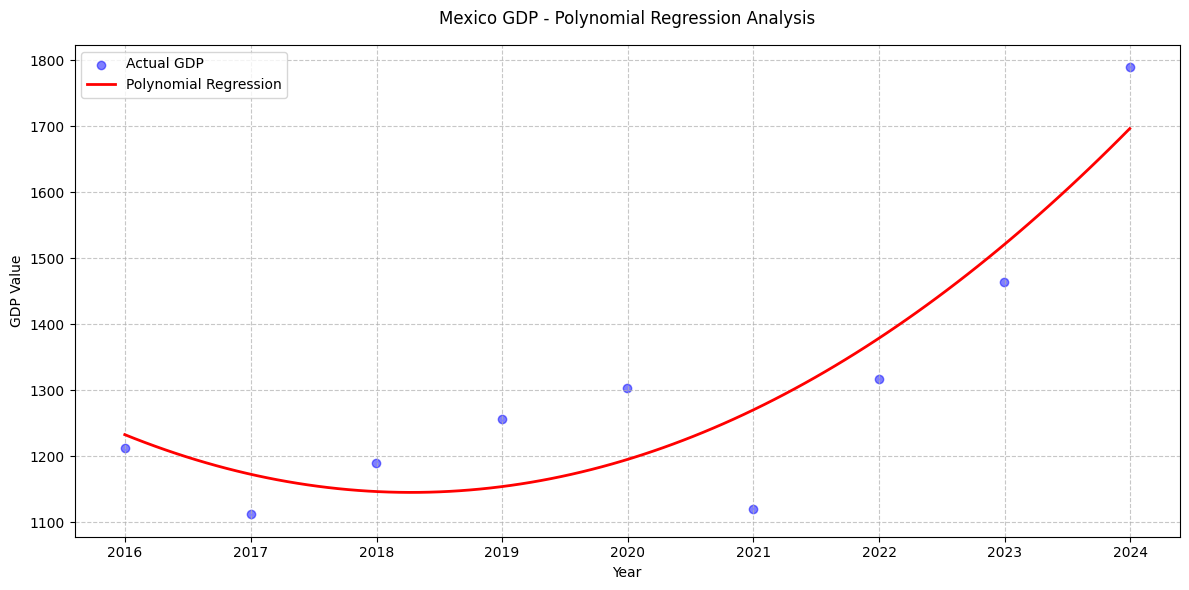

In [ ]:
# Data preparation
X = (clean_data['DateTime'] - clean_data['DateTime'].min()).dt.days.values.reshape(-1, 1)
y = clean_data['Value'].values

# Create and fit polynomial regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly, y)

# Generate smooth prediction curve
X_smooth = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_smooth_poly = poly.transform(X_smooth)
y_smooth = model.predict(X_smooth_poly)#True value here

# Create proper datetime index for smooth curve
smooth_dates = pd.date_range(
    start=clean_data['DateTime'].min(),
    end=clean_data['DateTime'].max(),
    periods=100
)

# Create visualization
plt.figure(figsize=(12, 6))
plt.scatter(clean_data['DateTime'], clean_data['Value'], 
           color='blue', alpha=0.5, label='Actual GDP')
plt.plot(smooth_dates, y_smooth, 'r-', 
         linewidth=2, label='Polynomial Regression')

# Customize plot
plt.title('Country GDP - Polynomial Regression Analysis', fontsize=12, pad=15)
plt.xlabel('Year', fontsize=10)
plt.ylabel('GDP Value', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Calculate and display R-squared score
r2_score = model.score(X_poly, y)
print(f"\nR-squared score: {r2_score:.4f}")